In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

from scripts import analysis

In [2]:
repos = analysis.get_fake_star_repos_all()
print(
    f"{len(repos)} repos,",
    f"{len(repos[repos.n_stars_low_activity > 0])} with low activity,",
    f"{len(repos[repos.n_stars_clustered > 0])} with clusters,",
    f"{len(repos[(repos.n_stars_low_activity > 0) & (repos.n_stars_clustered > 0)])} with both",
)
repos.head()

15867 repos, 4095 with low activity, 12312 with clusters, 540 with both


,repo_id,repo_name,n_stars,n_stars_latest,n_stars_low_activity,p_stars_low_activity,n_stars_clustered,p_stars_clustered,p_stars_fake
0,NaN,zz8nstokeronterry/dasdasfacxzcass,97.0,0.0,97.0,1.0,0.0,0.0,1.0
1,NaN,zyzxxz/IObit-Uninstaller-Latest-Version-Crack,77.0,0.0,0.0,0.0,77.0,1.0,1.0
2,NaN,zyzxxz/HWID-spoofer-for-games,78.0,0.0,0.0,0.0,78.0,1.0,1.0
3,NaN,zyzxxz/Free-Crypto-Trading-Bot-Download,87.0,0.0,0.0,0.0,87.0,1.0,1.0
4,NaN,zyzxxz/Autodesk-Maya-Crack,91.0,0.0,0.0,0.0,91.0,1.0,1.0


In [3]:
stars = analysis.get_stars_by_month_all()
stars.head()

,repo,month,n_stars,n_stars_low_activity,n_stars_clustered,n_stars_other
0,002sj/Crypto-Trading-Bots-for-FREE-Binance-ByB...,2024-02,672.0,0.0,672.0,0.0
1,00Gaurav-Chauhan00/4k-Video-Downloader-Crack,2024-04,495.0,0.0,495.0,0.0
2,00x1337/Adobe-Main,2024-04,240.0,0.0,240.0,0.0
3,01-ai/Yi,2023-11,4577.0,0.0,28.0,4549.0
4,01-ai/Yi,2023-12,593.0,0.0,8.0,585.0


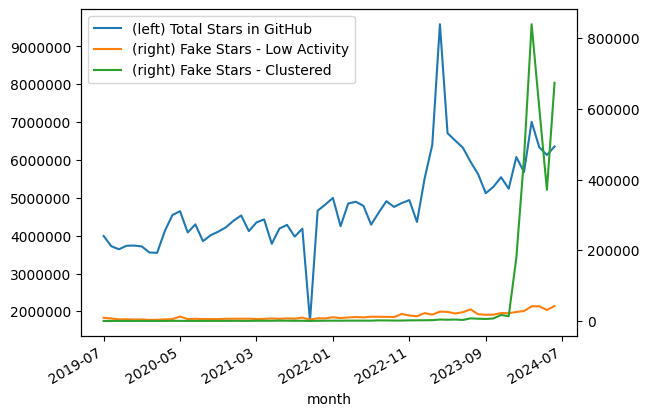

In [4]:
fig, ax = plt.subplots()
pd.read_csv("data/stars_by_month.csv").plot(ax=ax, secondary_y=False, logy=False)
ax2 = (
    stars[stars.month != "2024-07"]
    .groupby("month")
    .agg(
        n_stars_low_activity=("n_stars_low_activity", "sum"),
        n_stars_clustered=("n_stars_clustered", "sum"),
    )
    .plot(ax=ax, secondary_y=True, logy=False)
)
# Ugly formatting code
ax2.ticklabel_format(style="plain", axis="y")
ax.ticklabel_format(style="plain", axis="y")
labels = ax.get_xticklabels()
labels[7].set_text("2024-07")
ax.set_xticklabels(labels)
ax.legend(
    labels=[
        "(left) Total Stars in GitHub",
        "(right) Fake Stars - Low Activity",
        "(right) Fake Stars - Clustered",
    ],
    handles=[ax.lines[0], ax2.lines[0], ax2.lines[1]],
)
fig.autofmt_xdate()

In [5]:
stars["seems_like_compaign"] = (stars["n_stars_low_activity"] >= 50) & (
    stars["n_stars_low_activity"] / stars["n_stars"] >= 0.5
) | (
    (stars["n_stars_clustered"] >= 50)
    & (stars["n_stars_clustered"] / stars["n_stars"] >= 0.5)
)

repos_all = set(stars.repo)
repos_with_compaign = set(stars[stars.seems_like_compaign].repo)
repos_alive = set(repos[repos.repo_id.notna()].repo_name)

print(f"{len(repos_with_compaign)} of {len(repos_all)} repos with campaign")
print(f"{len(repos_alive)} of {len(repos_all)} repos alive")
print(f"{len(repos_with_compaign & repos_alive)} repos with campaign and alive")

10267 of 15867 repos with campaign
5743 of 15867 repos alive
1222 repos with campaign and alive


,repo_id,repo_name,n_stars,n_stars_latest,n_stars_low_activity,p_stars_low_activity,n_stars_clustered,p_stars_clustered,p_stars_fake
4045,R_kgDOLpnEsg,Abdullah-2255/Abdullah-2255,50.0,42.0,0.0,0.000000,50.0,1.000000,1.000000
6923,R_kgDOLi4O_Q,uegdfkmh/fynfg,51.0,1.0,0.0,0.000000,50.0,0.980392,0.980392
4124,R_kgDOKHrCPg,riazsha/cardanimation,52.0,51.0,0.0,0.000000,52.0,1.000000,1.000000
7732,R_kgDOLfEstQ,bopmad1212/baldur,52.0,0.0,0.0,0.000000,50.0,0.961538,0.961538
3993,R_kgDOMGukLw,riazsha/django,52.0,52.0,0.0,0.000000,52.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...
11140,R_kgDOLEzKcw,RVC-Boss/GPT-SoVITS,54507.0,60158.0,576.0,0.010567,18176.0,0.333462,0.344029
13994,MDEwOlJlcG9zaXRvcnkxMTE3MTU0OA==,nlohmann/json,57572.0,83320.0,158.0,0.002744,972.0,0.016883,0.019628
10642,R_kgDOLhdsRA,xai-org/grok-1,92038.0,98448.0,1021.0,0.011093,44179.0,0.480008,0.491102
13846,MDEwOlJlcG9zaXRvcnkxNDU1NTM2NzI=,fighting41love/funNLP,117387.0,133393.0,633.0,0.005392,2019.0,0.017200,0.022592


Text(0.5, 0, '# of Active Months')

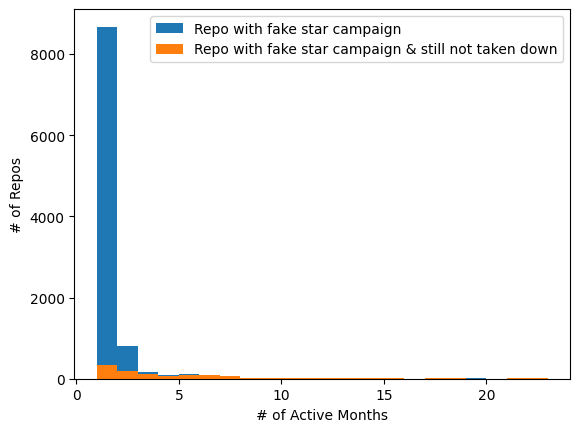

In [10]:
repo_to_months = (
    stars.groupby("repo")
    .agg(
        n_months=("month", "count"),
    )
    .reset_index()
)

fig, ax = plt.subplots()
repo_to_months[repo_to_months.repo.isin(repos_with_compaign)].plot(
    kind="hist",
    bins=range(1, 24),
    ax=ax,
)
repo_to_months[repo_to_months.repo.isin(repos_with_compaign & repos_alive)].plot(
    kind="hist",
    bins=range(1, 24),
    ax=ax,
)
ax.legend(
    [
        "Repo with fake star campaign",
        "Repo with fake star campaign & still not taken down",
    ]
)
ax.set_ylabel("# of Repos")
ax.set_xlabel("# of Active Months")

In [8]:
successful_repos = repos[
    repos.repo_name.isin(repos_with_compaign & repos_alive)
].sort_values(by="n_stars", ascending=False)
sum(successful_repos.n_stars_low_acitivty), sum(successful_repos.n_stars_latest)

(1529406.0, 1826665.0)

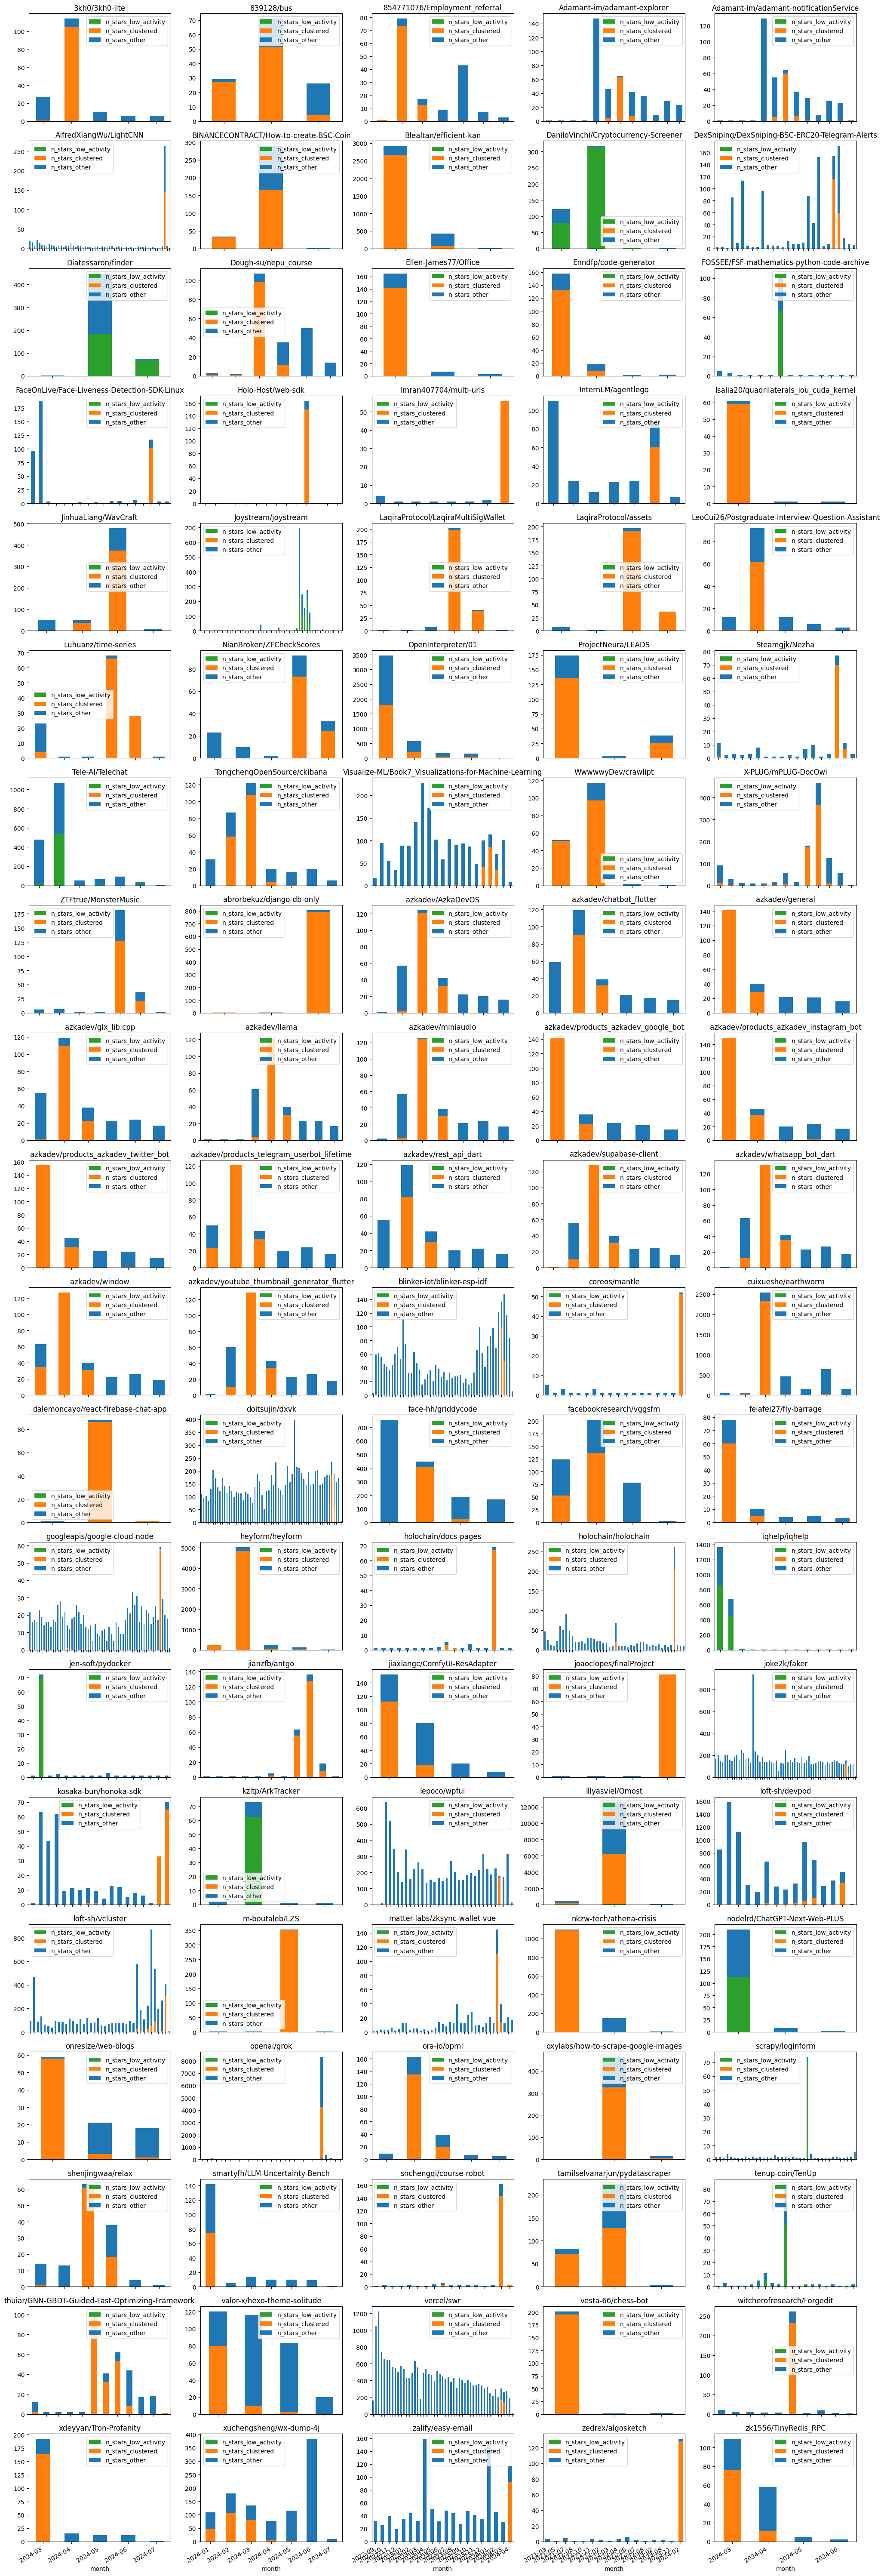

In [11]:
repo_samples = random.sample(
    sorted(
        (repos_alive & repos_with_compaign)
        & set(repo_to_months[repo_to_months.n_months >= 3].repo)
    ),
    100,
)
#repo_samples = list(successful_repos.head(100).repo_name)

fig, axes = plt.subplots(20, 5, figsize=(20, 60))
for i, (repo, df) in enumerate(stars[stars.repo.isin(repo_samples)].groupby("repo")):
    df[["month", "n_stars_low_activity", "n_stars_clustered", "n_stars_other"]].plot(
        kind="bar",
        x="month",
        stacked=True,
        ax=axes[i // 5, i % 5],
        title=repo,
        color=["C2", "C1", "C0"],
    )
fig.autofmt_xdate()
fig.tight_layout()